In [1]:
with open("puzzles/09", "r") as fp:
    data = fp.read()[:-1].split()

In [3]:
def parse_as_input(line):
    a, b = line.split(",")
    return int(a), int(b)

In [4]:
lines = list(map(parse_as_input, data))

In [5]:
def get_area(part_i, part_j):
    xi, yi = part_i
    xj, yj = part_j

    return (abs(xi - xj)+1) * (abs(yi - yj)+1)
    

# Part 1

In [6]:
maxi = 0
for idx, part_i in enumerate(lines):
    for jdx, part_j in enumerate(lines[:idx]):
        area = get_area(part_i, part_j)
        maxi = max(area, maxi)

print("Part 1:", maxi)


Part 1: 4741451444


# Part 2

1. Recompute all possible areas, between all possible values
2. Create a function that check if the area is valid regarding the shape

In [8]:
#(100000 **2)/1024**3 => 10 GB to store the puzzle

9.313225746154785

In [16]:
lst_size = []
for idx, part_i in enumerate(lines):
    for jdx, part_j in enumerate(lines[:idx]):
        area = get_area(part_i, part_j)
        lst_size.append((area, part_i, part_j))

In [17]:
lst_size = sorted(lst_size, key=lambda x: x[0], reverse=True)

### Check if a line cut the block or not

Ligne traversante.


.................
...x.............
.................
.===.............
.............x...
.................

Too high: 4509771600
Too high  4491713360
Too low:   144643743


Not right ...: 1257080945

In [31]:
lst_new = []
for area, part_i, part_j in lst_size:
    xi, yi = part_i
    xj, yj = part_j
    flag = True
    for previous, after in zip(lines[:-1], lines[1:]):
        x0, y0 = previous
        x1, y1 = after

        if ((xj > x0) & (x0 > xi)) |  ((xj < x0) & (x0 < xi)) | ((xj > x1) & (x1 > xi)) |  ((xj < x1) & (x1 < xi)) :
            if ((yj <= y1) & (y1 <= yi)) | ((yj >= y1) & (y1 >= yi)):
                # quelle que soit la localisation du y1, tant que traversant
                flag = False
                break
            elif ((yj <= y0) & (y0 <= yi)) | ((yj >= y0) & (y0 >= yi)):
                flag = False
                break
        
        elif ((yj > y0) & (y0 > yi)) |  ((yj < y0) & (y0 < yi)) | ((yj > y1) & (y1 > yi)) |  ((yj < y1) & (y1 < yi)):
            if ((xj <= x1) & (x1 <= xi)) | ((xj >= x1) & (x1 >= xi)):
                # quelle que soit la localisation du y1, tant que traversant
                flag = False
                break
            elif ((xj <= x0) & (x0 <= xi)) | ((xj >= x0) & (x0 >= xi)):
                flag = False
                break

    if flag:
        lst_new.append((area, part_i, part_j))
        

In [26]:
len(lst_new), len(lst_size)

(1700, 122760)

### Remove edges

For each element, try to see if the line is 


.......u..............;
.......u...............
.....uuoxxxx..........
.......xxxxo..........
......................

#### Try one, see elements in

In [93]:

for idx, (area, part_i, part_j) in enumerate(lst_new):
    xi, yi = part_i
    xj, yj = part_j
    
    lst = []
    for x, y in lines:
        if ((xi <= x) & (x <= xj)) | ((xj <= x) & (x <= xi)):
            if ((yi <= y) & (y <= yj)) | ((yj <= y) & (y <= yi)):
                lst.append((x, y))
            
    print(idx, "\t", area)
    if len(lst) > 2:
        break


0 	 4509771600
1 	 4505077227
2 	 4502233523
3 	 4491713360
4 	 4481853988
5 	 4477618035
6 	 4473161924
7 	 4471734000
8 	 4465497510
9 	 4450915619
10 	 4448414070
11 	 4447681419
12 	 4444557654
13 	 4440293208
14 	 4436794025
15 	 4416661340
16 	 4411797066
17 	 4410787920
18 	 4406725950
19 	 4406053945
20 	 4405821498
21 	 4397953734
22 	 4394835298
23 	 4394608673
24 	 4393487070
25 	 4379511286
26 	 4371667259
27 	 4371112898
28 	 4356900000
29 	 4354226712
30 	 4345384554
31 	 4331008128
32 	 4327894272
33 	 4312479633
34 	 4303595257
35 	 4302364572
36 	 4280525704
37 	 4263083780
38 	 4255467251
39 	 4254805566
40 	 4214954053
41 	 4213525920
42 	 4209910708
43 	 4205830281
44 	 4179366706
45 	 4167737134
46 	 4163707539
47 	 4136990968
48 	 4123110816
49 	 4117196459
50 	 4088815074
51 	 4076835000
52 	 4075853088
53 	 4074604424
54 	 4033785047
55 	 4031634256
56 	 4015637406
57 	 4013482788
58 	 3987686521
59 	 3966446574
60 	 3963036192
61 	 3935543952
62 	 3928545351
63

### How to know if IN or OUT ?

In [52]:
import matplotlib.pylab as plt

In [54]:
(60000 - 20000) * (80000 - 20000)

2400000000

In [55]:
xx = list(map(lambda x: x[0], lines))
yy = list(map(lambda x: x[1], lines))


In [77]:
print(area)

4509771600


1562459680


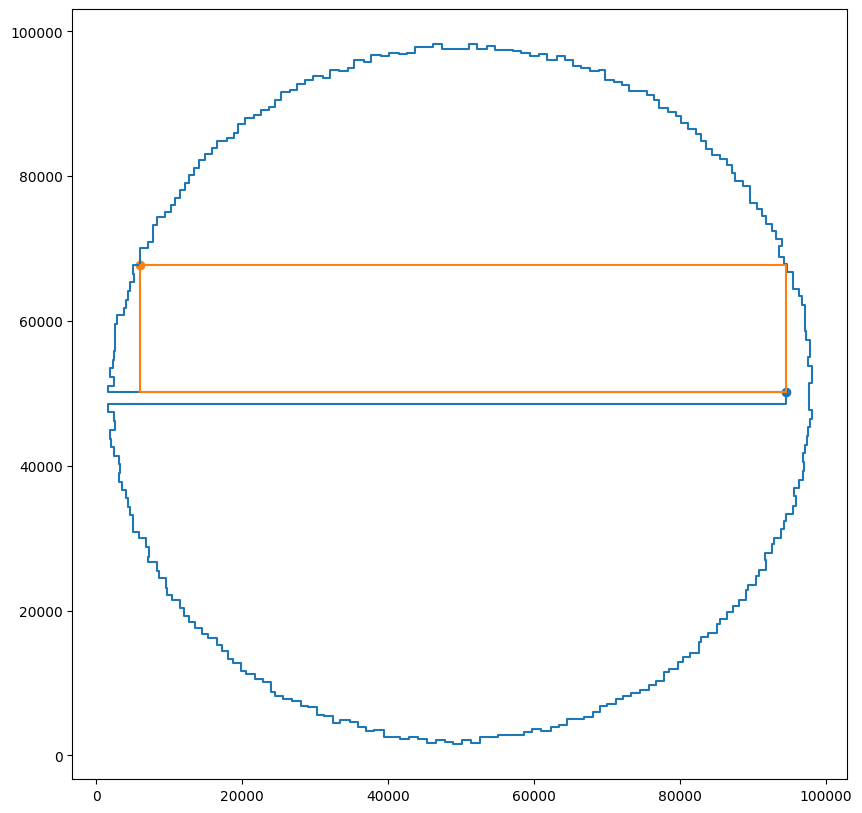

In [158]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(xx, yy)


area, part_0, part_1 = lst_new[11]
print(area)

x0, y0 = part_0
x1, y1 = part_1
plt.scatter(*part_0)
plt.scatter(*part_1, color="C1")


plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0], "C1")
#ax.set_ylim(48000, 51000)
#ax.set_xlim(00, 20000)

#ax.set_ylim(65000, 75000)
#ax.set_xlim(80000, 100000)

#ax.set_ylim(80000, 90000)
#ax.set_xlim(80000, 90000)

#ax.set_ylim(15000, 25000)
#ax.set_xlim(80000, 90000)



In [111]:
for (x0, y0), (x1, y1) in zip(lines[:-1], lines[1:]):
    dx = abs(x0-x1)
    dy = abs(y0 -y1)
    if dx + dy > 10000:
        print(x0, y0)
        print(x1, y1)
        print()

1537 50158
94553 50158

94553 48602
1655 48602



In [117]:
x_k1, y_k1 = 94553, 48602
x_k0, y_k0 = 1537, 50158


In [133]:
def get_point_inside(part_i, part_j):
    xi, yi = part_i
    xj, yj = part_j
    
    lst = []
    for x, y in lines:
        if ((xi <= x) & (x <= xj)) | ((xj <= x) & (x <= xi)):
            if ((yi <= y) & (y <= yj)) | ((yj <= y) & (y <= yi)):
                lst.append((x, y))

    return lst

In [143]:
lst_new = []
lst_bis = []
for area, part_i, part_j in lst_size:
    xi, yi = part_i
    xj, yj = part_j

    if ((yi >= y_k0) & (yj >= y_k0)) | ((yi <= y_k1) & (yj <= y_k1)):
        xxx = get_point_inside(part_i, part_j)
        if len(xxx) < 10:
            lst_new.append((area, part_i, part_j))
            lst_bis.append((area, part_i, part_j, len(xxx)))

    if area < 144643743:
        break

In [135]:
print(len(lst_new))

1085


In [157]:
lst_bis[10:20]

[(1576271081, (5795, 30844), (94553, 48602), 7),
 (1562459680, (94553, 50158), (5939, 67789), 2),
 (1500264000, (4986, 31853), (94553, 48602), 7),
 (1499426500, (5036, 31853), (94553, 48602), 5),
 (1458834660, (94553, 50158), (5000, 66447), 4),
 (1457189370, (94553, 50158), (5101, 66447), 3),
 (1390078924, (4622, 33146), (94553, 48602), 5),
 (1384452576, (4986, 33146), (94553, 48602), 3),
 (1366028560, (94553, 50158), (4589, 65341), 4),
 (1358254352, (94553, 50158), (5101, 65341), 2)]